In [2]:
import os
import zipfile as zf
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2

# Path to the repaired ZIP file
zip_file_path = "PartB_DFU_dataset - Copy.zip"
extract_path = "DFU_dataset"

if os.path.exists(zip_file_path):
    try:
        with zf.ZipFile(zip_file_path, 'r') as files:
            files.extractall(extract_path)
        print(f"Extraction completed successfully to '{extract_path}'")
    except zf.BadZipFile:
        print("Error: The ZIP file is corrupted.")
    except OSError as e:
        print(f"OS error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
else:
    print(f"Error: The file '{zip_file_path}' does not exist.")


2024-12-24 13:49:12.462143: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Extraction completed successfully to 'DFU_dataset'


In [3]:
import numpy as np # linear algebra
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
# Define the root directory where your image folders are located
root_directory = "DFU_dataset/PartB_DFU_dataset - Copy"

# Initialize lists to store image paths and corresponding class labels for both datasets
image_paths_ischaemia = []
categories_ischaemia = []
image_paths_infection = []
categories_infection = []

# Iterate over each class and its subdirectories
for class_name in ["Infection", "Ischaemia"]:
    for augmentation_type in ["Aug-Negative", "Aug-Positive"]:
        folder_path = os.path.join(root_directory, class_name, augmentation_type)
        category = f"{class_name.lower()}{'pov' if 'Positive' in augmentation_type else 'neg'}"
        
        # Iterate over image files in the current directory
        for file_name in os.listdir(folder_path):
            if file_name.endswith(".jpg"):  # Assuming images are jpg format
                image_path = os.path.join(folder_path, file_name)
                if class_name == "Ischaemia":
                    image_paths_ischaemia.append(image_path)
                    categories_ischaemia.append("ischemia" if "Positive" in augmentation_type else "non-ischemia")
                elif class_name == "Infection":
                    image_paths_infection.append(image_path)
                    categories_infection.append("infection" if "Positive" in augmentation_type else "non-infection")

# Create DataFrames for each dataset
df_ischaemia = pd.DataFrame({"category": categories_ischaemia, "image_path": image_paths_ischaemia})
df_infection = pd.DataFrame({"category": categories_infection, "image_path": image_paths_infection})

# Label encoding for Ischaemia dataset
label_encoder_ischaemia = LabelEncoder()
df_ischaemia['Class_Label'] = label_encoder_ischaemia.fit_transform(df_ischaemia['category'])
print("Ischaemia Class Mapping:")
for class_label, numerical_label in zip(df_ischaemia['category'].unique(), df_ischaemia['Class_Label'].unique()):
    print(f"{class_label}: {numerical_label}")

# Label encoding for Infection dataset
label_encoder_infection = LabelEncoder()
df_infection['Class_Label'] = label_encoder_infection.fit_transform(df_infection['category'])
print("Infection Class Mapping:")
for class_label, numerical_label in zip(df_infection['category'].unique(), df_infection['Class_Label'].unique()):
    print(f"{class_label}: {numerical_label}")

# Shuffle both DataFrames
df_ischaemia = df_ischaemia.sample(frac=1).reset_index(drop=True)
df_infection = df_infection.sample(frac=1).reset_index(drop=True)

# Helper function to load and process images
def load_images(df):
    images = []
    target_labels = []   
    for index, row in df.iterrows():
        image = Image.open(row['image_path'])
        image_array = np.array(image.resize((224, 224)))  # Resize image to fit MobileNet input size
        images.append(image_array)
        target_labels.append(row['Class_Label'])
    return np.array(images), np.array(target_labels)

# Load images for both datasets
images_ischaemia, target_labels_ischaemia = load_images(df_ischaemia)
images_infection, target_labels_infection = load_images(df_infection)

print("Shape of Ischaemia images array:", images_ischaemia.shape)
print("Shape of Ischaemia target labels array:", target_labels_ischaemia.shape)
print("Shape of Infection images array:", images_infection.shape)
print("Shape of Infection target labels array:", target_labels_infection.shape)

# Split the Ischaemia dataset
X_train_ischaemia, X_test_ischaemia, y_train_ischaemia, y_test_ischaemia = train_test_split(
    images_ischaemia, target_labels_ischaemia, test_size=0.3, random_state=42)
X_val_ischaemia, X_test_ischaemia, y_val_ischaemia, y_test_ischaemia = train_test_split(
    X_test_ischaemia, y_test_ischaemia, test_size=0.25, random_state=42)  # 0.25 * 0.3 = 0.075

# Split the Infection dataset
X_train_infection, X_test_infection, y_train_infection, y_test_infection = train_test_split(
    images_infection, target_labels_infection, test_size=0.3, random_state=42)
X_val_infection, X_test_infection, y_val_infection, y_test_infection = train_test_split(
    X_test_infection, y_test_infection, test_size=0.25, random_state=42)  # 0.25 * 0.3 = 0.075

print("Ischaemia Training set shape:", X_train_ischaemia.shape, y_train_ischaemia.shape)
print("Ischaemia Validation set shape:", X_val_ischaemia.shape, y_val_ischaemia.shape)
print("Ischaemia Test set shape:", X_test_ischaemia.shape, y_test_ischaemia.shape)
print("Infection Training set shape:", X_train_infection.shape, y_train_infection.shape)
print("Infection Validation set shape:", X_val_infection.shape, y_val_infection.shape)
print("Infection Test set shape:", X_test_infection.shape, y_test_infection.shape)

Ischaemia Class Mapping:
non-ischemia: 1
ischemia: 0
Infection Class Mapping:
non-infection: 1
infection: 0
Shape of Ischaemia images array: (9870, 224, 224, 3)
Shape of Ischaemia target labels array: (9870,)
Shape of Infection images array: (5890, 224, 224, 3)
Shape of Infection target labels array: (5890,)
Ischaemia Training set shape: (6909, 224, 224, 3) (6909,)
Ischaemia Validation set shape: (2220, 224, 224, 3) (2220,)
Ischaemia Test set shape: (741, 224, 224, 3) (741,)
Infection Training set shape: (4123, 224, 224, 3) (4123,)
Infection Validation set shape: (1325, 224, 224, 3) (1325,)
Infection Test set shape: (442, 224, 224, 3) (442,)


In [4]:
import numpy as np
from kerastuner import HyperModel, HyperParameters
from kerastuner.tuners import BayesianOptimization, GridSearch
from tensorflow.keras.applications import EfficientNetB7,InceptionV3
from tensorflow.keras.layers import Dropout, TimeDistributed, Flatten, LSTM, Dense, BatchNormalization, GlobalAveragePooling2D, Reshape
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score

import pandas as pd
import time

# Define the model-building function
def build_model(hp):
    base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    for layer in base_model.layers:
        layer.trainable = False
    
    model = Sequential([
        base_model,
        TimeDistributed(Flatten()),
        LSTM(hp.Int('lstm_units_1', min_value=60, max_value=80, step=30), 
             dropout=hp.Float('dropout_1', min_value=0.2, max_value=0.3, step=0.1), 
             return_sequences=True),
        LSTM(hp.Int('lstm_units_2', min_value=30, max_value=60, step=10), 
             dropout=hp.Float('dropout_2', min_value=0.2, max_value=0.3, step=0.1), 
             return_sequences=True),
        LSTM(hp.Int('lstm_units_3', min_value=10, max_value=30, step=10), 
             dropout=0.2, 
             return_sequences=False),
        Dense(84, activation='relu'),
        Dropout(0.3),
        BatchNormalization(),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.005),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Instantiate the tuner
tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='LSTM_inceptionV3_tunning',
    project_name='Bay_infec_tuning'
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

# Run the search and log trial results
tuner.search(X_train_infection, y_train_infection, epochs=5, 
             validation_data=(X_val_infection, y_val_infection), 
             callbacks=[reduce_lr, early_stopping])


Trial 5 Complete [00h 00m 57s]
val_accuracy: 0.5871698260307312

Best val_accuracy So Far: 0.6649056673049927
Total elapsed time: 00h 04m 44s


In [5]:
import time
from sklearn.metrics import precision_score, recall_score, f1_score

# Start time for training
start_training_time = time.time()

# Get the best hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Fit the model and collect the training metrics
history = best_model.fit(X_train_infection, y_train_infection, epochs=20, batch_size=32, 
                         validation_data=(X_val_infection, y_val_infection), 
                         callbacks=[early_stopping, reduce_lr])

# Collect training metrics
train_accuracy = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
train_f1 = f1_score(y_train_infection, np.argmax(best_model.predict(X_train_infection), axis=1), average='macro')
train_precision = precision_score(y_train_infection, np.argmax(best_model.predict(X_train_infection), axis=1), average='macro')
train_recall = recall_score(y_train_infection, np.argmax(best_model.predict(X_train_infection), axis=1), average='macro')

# End time for training
end_training_time = time.time()
training_time = end_training_time - start_training_time

# Start time for validation
start_validation_time = time.time()

# Validate the model
val_loss, val_accuracy = best_model.evaluate(X_val_infection, y_val_infection)

# Collect validation metrics
val_f1 = f1_score(y_val_infection, np.argmax(best_model.predict(X_val_infection), axis=1), average='macro')
val_precision = precision_score(y_val_infection, np.argmax(best_model.predict(X_val_infection), axis=1), average='macro')
val_recall = recall_score(y_val_infection, np.argmax(best_model.predict(X_val_infection), axis=1), average='macro')

# End time for validation
end_validation_time = time.time()
validation_time = end_validation_time - start_validation_time

# Start time for testing
start_testing_time = time.time()

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test_infection, y_test_infection)

# Predictions for classification metrics
y_pred = best_model.predict(X_test_infection)
y_pred_classes = np.argmax(y_pred, axis=1)

# Collect testing metrics
test_f1 = f1_score(y_test_infection, y_pred_classes, average='macro')
test_precision = precision_score(y_test_infection, y_pred_classes, average='macro')
test_recall = recall_score(y_test_infection, y_pred_classes, average='macro')

# End time for testing
end_testing_time = time.time()
testing_time = end_testing_time - start_testing_time

# Collect all metrics in a dictionary for easy access
metrics = {
    'Training Accuracy': train_accuracy,
    'Training Loss': train_loss,
    'Training F1 Score': train_f1,
    'Training Precision': train_precision,
    'Training Recall': train_recall,
    'Training Time (s)': training_time,
    'Validation Accuracy': val_accuracy,
    'Validation Loss': val_loss,
    'Validation F1 Score': val_f1,
    'Validation Precision': val_precision,
    'Validation Recall': val_recall,
    'Validation Time (s)': validation_time,
    'Test Accuracy': test_accuracy,
    'Test F1 Score': test_f1,
    'Test Precision': test_precision,
    'Test Recall': test_recall,
    'Testing Time (s)': testing_time
}

# Print the collected metrics
for metric, value in metrics.items():
    print(f"{metric}: {value}")

Epoch 1/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.5036 - loss: 0.8394 - val_accuracy: 0.5057 - val_loss: 0.6965 - learning_rate: 0.0050
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.4963 - loss: 0.7002 - val_accuracy: 0.4951 - val_loss: 0.6948 - learning_rate: 0.0050
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.4992 - loss: 0.6967 - val_accuracy: 0.5049 - val_loss: 0.6946 - learning_rate: 0.0050
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.5054 - loss: 0.6992 - val_accuracy: 0.6015 - val_loss: 0.6845 - learning_rate: 0.0050
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.5478 - loss: 0.6880 - val_accuracy: 0.6068 - val_loss: 0.6589 - learning_rate: 0.0050
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.5669 - loss: 0.6844 - val_accuracy: 0.5774 - val_loss: 0.6690 - learning_rate: 0.0050
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.5482 - loss: 0

You must install pydot (`pip install pydot`) for `plot_model` to work.
Best Hyperparameters: [60, 0.2, 30, 0.2, 10]


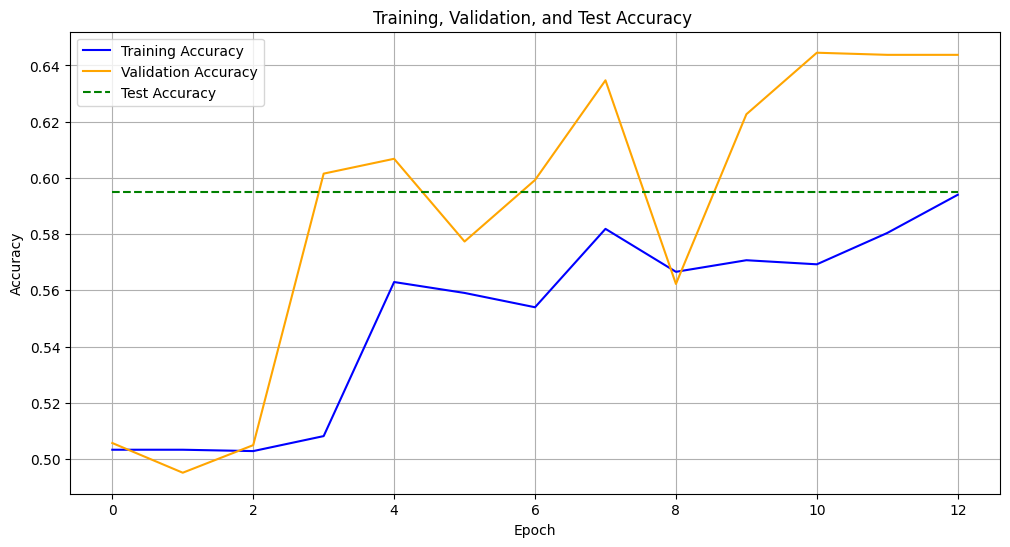

In [6]:
import matplotlib.pyplot as plt
tf.keras.utils.plot_model(best_model, to_file='best_model_isechamia_Mobilenetv2.png', show_shapes=True, show_layer_names=True)

# Extract best hyperparameters as a dictionary
best_params = best_hps.values

# Convert the best hyperparameters dictionary to an array
best_params_array = list(best_params.values())

# Print the best parameters as an array
print("Best Hyperparameters:", best_params_array)


# Plot training, validation, and test accuracy
plt.figure(figsize=(12, 6))

# Training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
# Validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
# Test accuracy
plt.plot([0, len(history.history['accuracy']) - 1], [metrics['Test Accuracy']] * 2, label='Test Accuracy', linestyle='--', color='green')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training, Validation, and Test Accuracy ')
plt.grid(True)
plt.show()